# TDx Data Pull

**Author:** Eric Englin

**Date:** 10/10/23

**Description:** This code will pull the latest NPS API for the TDx feed. It will create a quick summary figure of the data. 

In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?type=workzone&api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [3]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [4]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [5]:
today_string

'2023-12-28'

In [6]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(3, 3, 1)

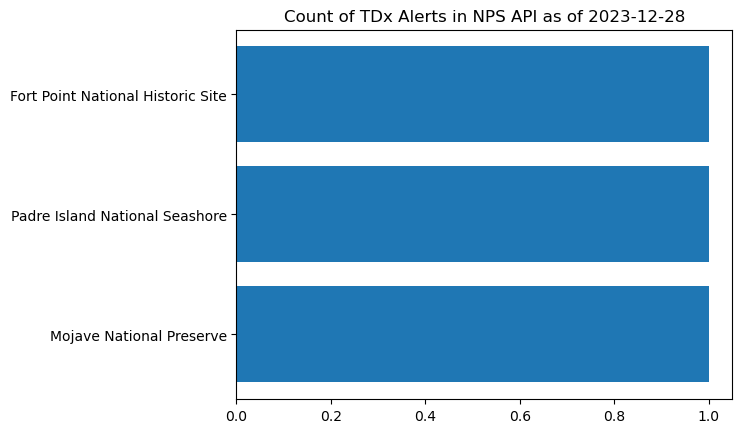

In [7]:
#create a quick summary figure


# Create the plot
plt.barh(park_df['park'], park_df['number of alerts'])

# Set the title
plt.title("Count of TDx Alerts in NPS API as of " + today_string)

# Show the chart
plt.show()


C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_40080\777992271.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_40080\777992271.py:31: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(18)


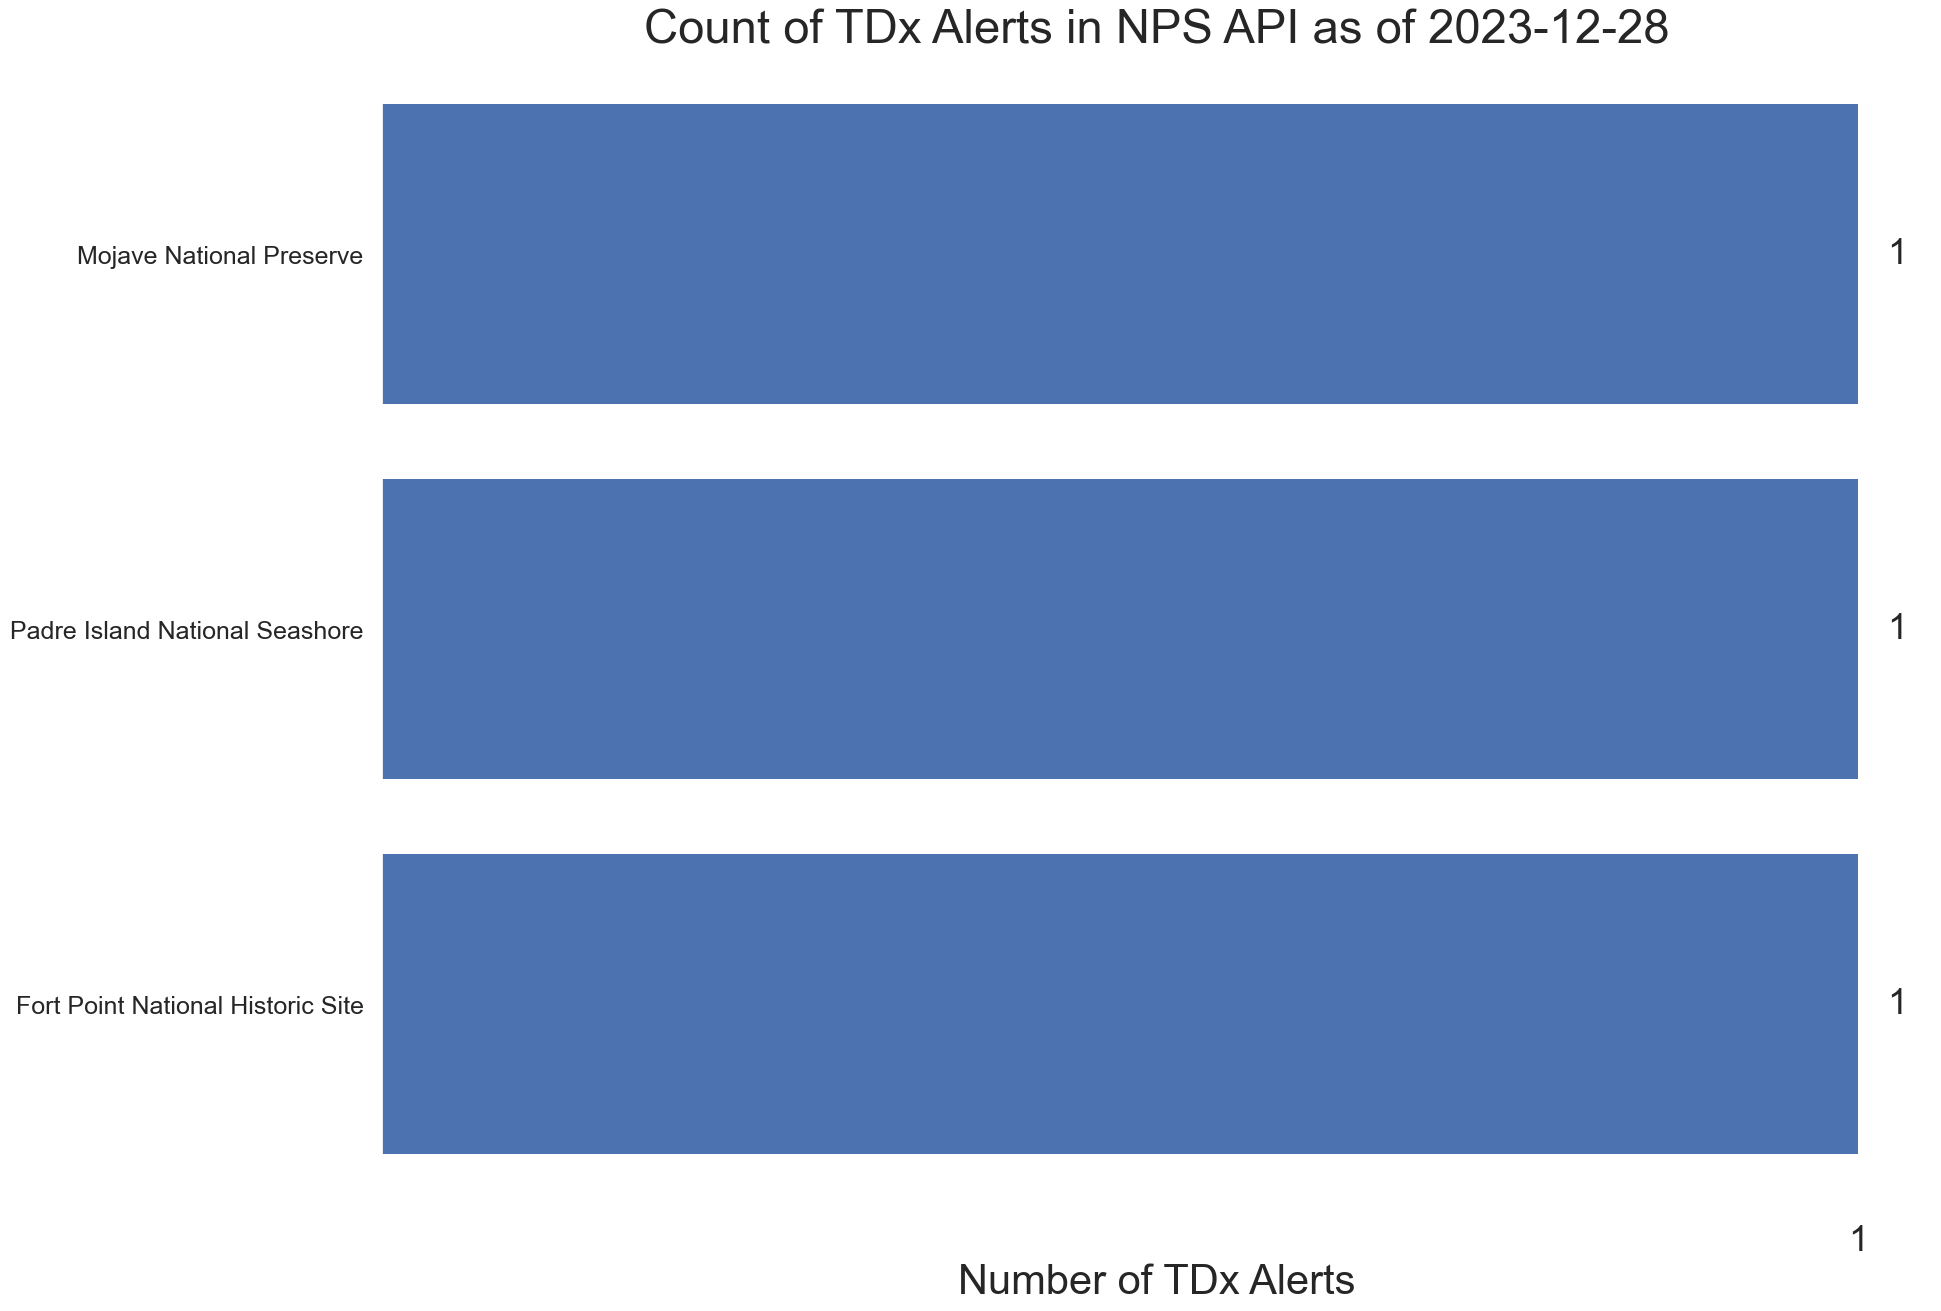

In [8]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = park_df['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = park_df['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(park_df['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [9]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Mojave National Preserve
Alert name:  Cima Road Closed to ALL VEHICLES due to Construction
Description:  Cima Road is undergoing a major renovation for visitor and wildlife safety upgrades. Please do not drive around barricades or cross this active construction zone.
Event type:  work-zone
Road name:  ['Cima Road']
Vehicle impact:  all-lanes-closed
Dates:  2023-07-26T09:54:00Z to  2024-03-31T09:49:00Z

Park: Padre Island National Seashore
Alert name:  Heavy machinery traffic on South Beach
Description:  Drivers on South Beach may encounter large vehicles and heavy machinery entering, exiting, and traveling on the beach for contracted work.
Event type:  work-zone
Road name:  ['South Beach']
Vehicle impact:  unknown
Dates:  2023-10-25T06:53:00Z to  2024-01-31T07:53:00Z

Park: Fort Point National Historic Site
Alert name:  Intermittent Temporary Lane Closure on Marine Drive December 18, 2023 thru 
Description:  Temporary lane closure in effect Monday thru Thursday 7am to 5:30pm so c

In [10]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "event end date": end_date_list
})

In [11]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [12]:
df_update = pd.concat([df_update, df_old_update])

In [13]:
df_update.shape

(33, 9)

In [14]:
df_update.columns

Index(['date', 'park', 'alert name', 'description', 'event type', 'road name',
       'vehicle impact', 'event start date', 'event end date'],
      dtype='object')

In [15]:
df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()



,park,date,alert name,number of alerts,event type,road name,vehicle impact,event start date,event end date
0,Muir Woods National Monument,1,1,1,1,1,1,1,1
1,Dinosaur National Monument,2,2,2,2,2,2,2,2
2,Fort Point National Historic Site,2,2,2,2,2,2,2,2
3,Golden Gate National Recreation Area,2,2,2,2,2,2,2,2
4,Natchez Trace Parkway,3,3,3,3,3,3,3,3
5,Padre Island National Seashore,3,3,3,3,3,3,3,3
6,Olympic National Park,4,4,4,4,4,4,4,4
7,Yosemite National Park,4,4,4,4,4,4,4,4
8,Mojave National Preserve,5,5,5,5,5,5,5,5
9,Acadia National Park,7,7,7,7,7,7,7,7


In [16]:
df_update_agg = df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()


C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_40080\429607619.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_40080\429607619.py:31: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(18)


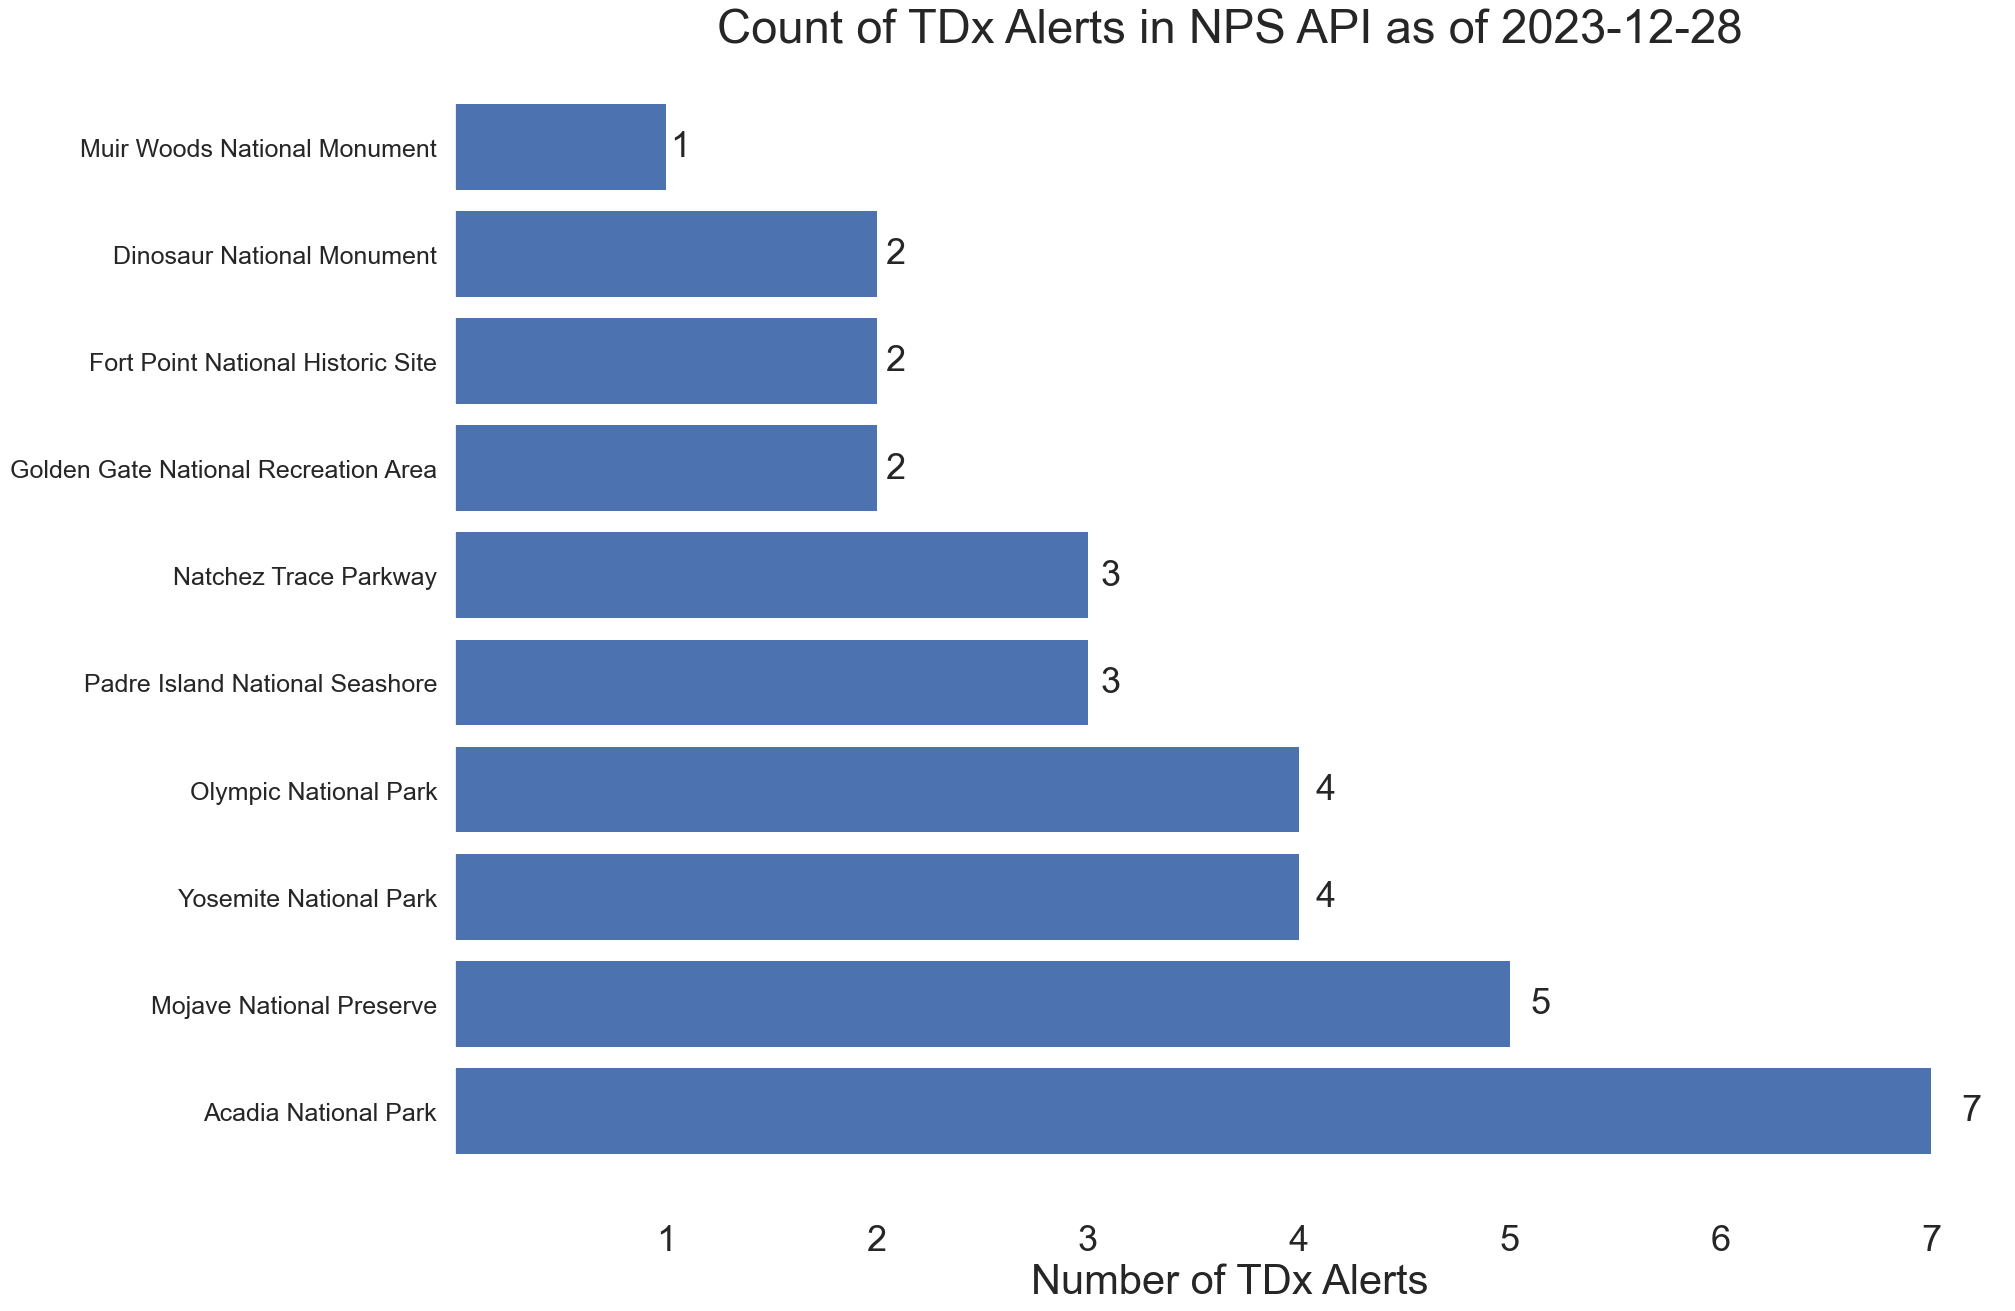

In [17]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = df_update_agg['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = df_update_agg['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(df_update_agg['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [18]:
df_update.to_csv("./TDx_tracker.csv", index=False)